In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
air= pd.read_csv("C:\\Users\\kumar\\Python Assign\\clustering\\Assignments\\EastWestAirlines.csv")

#### WE ALWYAYS DO AGGLOMERATIVE HEIRARCHIAL CLUSTERING AS DIIVSIVE IS NOT SUITABLE FOR REAL WORLDPROBLLEMS

In [2]:
air.isnull().sum()

id                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
award                0
dtype: int64

In [3]:
air.describe()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


NO NULL VALUES SO SCALING THE FEATURES

In [4]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
air.id=scaler.fit_transform(air[['id']])
air.Balance=scaler.fit_transform(air[['Balance']])
air.Qual_miles=scaler.fit_transform(air[['Qual_miles']])
air.cc1_miles=scaler.fit_transform(air[['cc1_miles']])
air.cc2_miles=scaler.fit_transform(air[['cc2_miles']])
air.cc3_miles=scaler.fit_transform(air[['cc3_miles']])
air.Bonus_miles=scaler.fit_transform(air[['Bonus_miles']])
air.Bonus_trans=scaler.fit_transform(air[['Bonus_trans']])
air.Flight_miles_12mo=scaler.fit_transform(air[['Flight_miles_12mo']])
air.Flight_trans_12=scaler.fit_transform(air[['Flight_trans_12']])
air.Days_since_enroll=scaler.fit_transform(air[['Days_since_enroll']])
air.Award=scaler.fit_transform(air[['award']])

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float

In [5]:
air

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1
5,-1.730817,-0.567483,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,1.367365,0
6,-1.729955,0.112270,-0.186299,0.683121,-0.098242,-0.062767,0.428076,1.395256,-0.328603,-0.362168,1.392549,0
7,-1.729094,-0.523459,-0.186299,-0.769578,-0.098242,-0.062767,-0.492582,-0.791649,-0.150036,-0.098503,1.365428,1
8,-1.728232,3.666042,-0.186299,0.683121,6.675367,-0.062767,-0.637398,3.269747,2.421330,2.801807,1.370271,1
9,-1.727371,0.310220,-0.186299,0.683121,-0.098242,-0.062767,0.467168,1.707671,0.492805,0.428826,1.362038,1


## PLOTTING DENDOGRAM

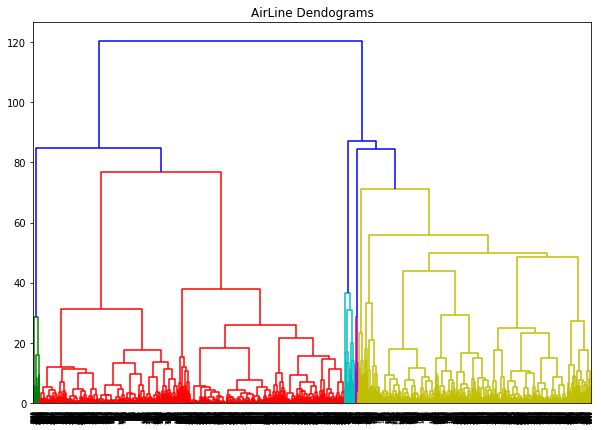

In [17]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("AirLine Dendograms")  
dend = shc.dendrogram(shc.linkage(air, method='ward'))  

### PLOTTING DENDOGRAM WITH THRESHOLD NUMBER OF CLUSTERS 

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 

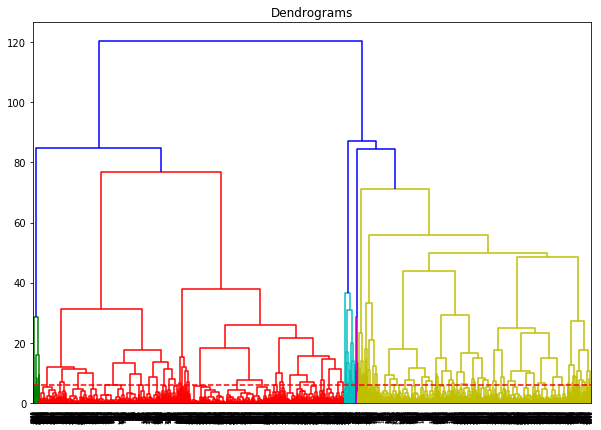

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(air, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

here more clusters are formed .. If we do pca we get accurate results

### YOU CAN SPECIFY THE NO.OF CLUSTERS YOU WANT

In [9]:
from sklearn.cluster import AgglomerativeClustering

heirarchial = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
heirarchial.fit_predict(air)  

array([2, 2, 2, ..., 9, 5, 5], dtype=int64)

In [13]:
lables=heirarchial.labels_ 

In [14]:
lables

array([2, 2, 2, ..., 9, 5, 5], dtype=int64)

In [16]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(air, lables)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.286679517798889

### DB VALUE IS LOW , IT MEANS CLUSTERING IS PERFECT 

##### HEIRARCHIAL CLUSTERING ALWAYS SHOWS THE POSSIBLE NO.OF CLUSTERS THAT CAN BE FORMED AND LACK  A LITTLE BIT OF PERFORMANCE DUE TO OUTLIERS OR IMPROPER PREPROCESSING